# Julia Basic Concepts

Ricardo A. Fernandes
ricardoaf@lccv.ufal.br

This notebook presents main Julia basic concepts and serves as a introductory guide to the language. It is based on the two following references:
- Kochenderfer, M. J. & Wheeler, T. A. (2019) Algorithms for Optimization, MIT Press
- Banas D. (2018) Julia Tutorial, http://www.newthinktank.com/2018/10/julia-tutorial/


## Variables
- Types are dynamically assigned and can be changed
- Variables start with \_, letters and then numbers, or !
- Unicode characters are also allowed, with a few restrictions

In [1]:
β = 3  # unicode chars: \beta(tab)
s = "Dogs: "
print(s, β)

Dogs: 3

## Types

### Booleans

The Boolean type in Julia, written *Bool*, includes the values **true** and **false**

In [2]:
x = true
y = false
typeof(x)

Bool

In [3]:
!x  # not

false

In [4]:
x && y  # and

false

In [5]:
x || y  # or

true

### Numbers
Julia supports integer and floating point numbers

In [6]:
typeof(42), typeof(42.0)

(Int64, Float64)

In [7]:
x = 4
y = 2
(x^2 + 2y) / (y + 1)

6.666666666666667

In [8]:
x % y  # x mod y

0

In [9]:
x += 1  # shortcut for x = x + 1

5

In [10]:
3 > 4

false

In [11]:
3 ≤ 4  # unicode also works

true

In [12]:
3 < 4 < 5

true

### Strings
A string is an array of characteres

In [13]:
s1 = "Just some random words"
length(s1)

22

In [14]:
s1[1], s1[end], s1[1:4]

('J', 's', "Just")

In [15]:
s2 = string("Hey", " you!")  # concatenation
s2 == "Hey" * " you!"

true

In [16]:
a = 2
b = 3
"$a + $b = $(a + b)"  # interpolation

"2 + 3 = 5"

In [17]:
s3 = "I
have
many
lines"
print(s3)

I
have
many
lines

In [18]:
"House" > "Home"  # string comparison (== > < !=)

true

In [19]:
occursin("key", "monkey")  # substring

true

### Vectors
- A *vector* is a 1D-array that stores a sequence of values
- Can be constructed using square brackets, separating elements by commas

In [20]:
x = [];                      # empty vector
x = trues(3);                # Boolean vector containing three trues
x = ones(3);                 # vector of three ones
x = zeros(3);                # vector of three zeros
x = rand(3);                 # vector of three random numbers between 0 and 1
x = [3, 1, 4];               # vector of integers
x = [3.1415, 1.618, 2.7182]; # vector of floats

*Array comprehension* can also be used to create vectors

In [21]:
print([sin(x) for x = 1:5])

[0.8414709848078965, 0.9092974268256817, 0.1411200080598672, -0.7568024953079282, -0.9589242746631385]

In [22]:
typeof([3, 1, 4]), typeof([3.1415, 1.618, 2.7182])

(Array{Int64,1}, Array{Float64,1})

In [23]:
println(x[1])        # first element is indexed by 1
println(x[3])        # third element
println(x[end])      # last element
println(x[end - 1])  # second to last element)

3.1415
2.7182
2.7182
1.618


In [24]:
x = [1, 1, 2, 3, 5, 8, 13]
println("len(x): ", length(x))  # vector length
println(x[1:3])                 # first three elements
println(x[1:2:end])             # elements with odd indices
println(x[end:-1:1])            # reverse order

len(x): 7
[1, 1, 2]
[1, 2, 5, 13]
[13, 8, 5, 3, 2, 1, 1]


In [25]:
println(sum(x))      # sum of vector elements
println(maximum(x))  # max value
println(minimum(x))  # min value

33
13
1


In [26]:
using Statistics
println(mean(x))  # mean of vector elements

4.714285714285714


In [27]:
println([x, x])              # concatenation
println(push!(x, -1))        # add an element to the end
println(pop!(x))             # remove and element from the end
println(append!(x, [2, 3]))  # append to the end of x
println(sort!(x))            # sort vector elements
x[1] = 2; println(x)         # change first element

[[1, 1, 2, 3, 5, 8, 13], [1, 1, 2, 3, 5, 8, 13]]
[1, 1, 2, 3, 5, 8, 13, -1]
-1
[1, 1, 2, 3, 5, 8, 13, 2, 3]
[1, 1, 2, 2, 3, 3, 5, 8, 13]
[2, 1, 2, 2, 3, 3, 5, 8, 13]


In [28]:
x = [1, 2]
y = [3, 4]
println(x + y)        # add vectors
println(3x - [1, 2])  # multiply by a scalar and subtract

[4, 6]
[2, 4]


In [29]:
using LinearAlgebra
println(dot(x,y))  # dot product
println(x⋅y)       # dot product using unicode character

11
11


In [30]:
# element-wise operations
println(x .* y)        # multiplication
println(x .^ 2)        # squaring
println(sin.(x))       # application of sin
println(sqrt.(x))      # application of sqrt
println(max.(x, 1.5))  # application of max{xᵢ,1.5}

[3, 8]
[1, 4]
[0.8414709848078965, 0.9092974268256817]
[1.0, 1.4142135623730951]
[1.5, 2.0]


### Matrices
- A *matrix* is a 2D-array
- Like a vector, can be constructed using square brackets
- Use spaces to delimit elements in the same row
- Use semicolons to delimit rows

In [31]:
X = [1 2 3; 4 5 6; 7 8 9; 10 11 12]
println(typeof(X))
size(X)

Array{Int64,2}


(4, 3)

In [32]:
println(X[2])        # 2nd element using column-major ordering
println(X[3,2])      # element in 3rd row and 2nd column
println(X[1,:])      # 1st row
println(X[:,2])      # 2nd column
println(X[:,1:2])    # first two columns
println(X[1:2,1:2])  # top left 2x2 submatrix

4
8
[1, 2, 3]
[2, 5, 8, 11]
[1 2; 4 5; 7 8; 10 11]
[1 2; 4 5]


In [33]:
println(Matrix(1.0I, 3, 3))             # 3x3 identity matrix
println(Matrix(Diagonal([3, 2, 1])))    # Diagonal matrix
println(rand(3,2))                      # Random matrix
println(zeros(3,2))                     # Matrix of zeros
println([sin(x + y) for x=1:3, y=1:2])  # array comprehension

[1.0 0.0 0.0; 0.0 1.0 0.0; 0.0 0.0 1.0]
[3 0 0; 0 2 0; 0 0 1]
[0.31022464293684116 0.005603043589117229; 0.7763868271910117 0.5773427092992909; 0.5044495051551829 0.04391764938332465]
[0.0 0.0; 0.0 0.0; 0.0 0.0]
[0.9092974268256817 0.1411200080598672; 0.1411200080598672 -0.7568024953079282; -0.7568024953079282 -0.9589242746631385]


In [34]:
println(X')       # complex conjugate transpose
println(3X .+ 2)  # multiplying by scalar and adding scalar
X = [1 3; 3 1]    # invertible matrix
println(inv(X))   # invsersion
println(det(X))   # determinant
println([X X])    # horizontal concatenation
println([X; X])   # vertical concatenation
println(sin.(X))  # element-wise application of sin

[1 4 7 10; 2 5 8 11; 3 6 9 12]
[5 8 11; 14 17 20; 23 26 29; 32 35 38]
[-0.125 0.375; 0.375 -0.125]
-8.0
[1 3 1 3; 3 1 3 1]
[1 3; 3 1; 1 3; 3 1]
[0.8414709848078965 0.1411200080598672; 0.1411200080598672 0.8414709848078965]


In [35]:
# Solving a system of linear equations
# 3x + 2y - z = 1
# 2x - 2y + 4z = -2
# -x + 1/2*y -z = 0

A = [3 2 -1; 2 -2 4; -1 1/2 -1]
b = [1, -2, 0]
x = A\b
print(x)

[0.9999999999999994, -1.9999999999999984, -1.9999999999999984]

### Tuples
- A *tuple* is an ordered list of values (can be of different types)
- Similar to arrays, but **can't be mutated!**
- Constructed with parentheses

In [36]:
x = (1,)  # a single element
x = (1, 0, [1, 2], 2.5, 4.66)  # third element is a vector
length(x)

5

In [37]:
x[2], x[end], x[4:end]

(0, 4.66, (2.5, 4.66))

In [38]:
t1 = ((1, 2), (3, 4))  # multidimensional tuple
println("t1[1][1] = ", t1[1][1])

t2 = (sue=("Sue", 100), paul=("Paul", 23)) # named tuple
println(t2.sue)

t1[1][1] = 1
("Sue", 100)


### Dictionaries
- A *dictionary* is a collection of key-value pairs
- Key-value pairs are indicated with a double arrow operator
- One can index into a dictionary using square brackers as arrays/tuples

In [39]:
x = Dict();  # empty dictionary
x[3] = 4     # associate value 4 with key 3

4

In [40]:
x = Dict(3=>4, 5=>1)  # create dictionary with 2 key-value pairs

Dict{Int64,Int64} with 2 entries:
  3 => 4
  5 => 1

In [41]:
println(x[5])          # return value associated with key 5
println(haskey(x, 3))  # check if dict has key 3
println(haskey(x, 4))  # check if dict has key 4

1
true
false


In [42]:
d1 = Dict("pi"=>3.14, "e"=>2.718)  # new dict
println(d1["pi"])                  # print value of "pi" key
d1["golden"] = 1.618               # add a key-value
delete!(d1, "pi")                  # delete a key-value
println(keys(d1))                  # display all keys
println(values(d1))                # display all keys

3.14
["golden", "e"]
[1.618, 2.718]


### Composite types
- A *composite type* is a collection of named fields
- Use **struct** keyword. By default, it is immutable
- Adding keyword **mutable** makes an instance mutable


- Double-colon operator can be used to annotate types (any variable)
- Annotation requires that one pass correct types for fields/variables
- Type annotations alow runtime improvements (compiler optimization)

In [43]:
struct Customer
    name::String
    balance::Float32
    id::Int
end

# Create a Customer object
bob = Customer("Bob Smith", 10.50, 123)
println(bob.name)

# Change bob name
bob.name = "Sue Smith"  # ERROR!

Bob Smith


LoadError: setfield! immutable struct of type Customer cannot be changed

In [44]:
mutable struct MCustomer
    name::String
    balance::Float32
    id::Int
end
bob = MCustomer("Bob Smith", 10.50, 123)

# Change bob name
bob.name = "Sue Smith"
println(bob.name)

Sue Smith


### Abstract Types
- Analog to classes in object-oriented languages (but without methods)

In [45]:
# Float64 hierarchy
println(supertype(Float64))
println(supertype(AbstractFloat))
println(supertype(Real))
println(supertype(Number))
println(supertype(Any))

AbstractFloat
Real
Number
Any
Any


In [46]:
println(subtypes(AbstractFloat))  # different types of AbstractFloats
println(subtypes(Float64))        # Float64 doesn't have any subtypes

Any[BigFloat, Float16, Float32, Float64]
Type[]


We can define our own abstract types
- They can't be instantiated like Structs, but can have subtypes

In [47]:
abstract type Animal end

struct Dog <: Animal
    name::String
    bark::String
end

struct Cat <: Animal
    name::String
    meow::String
end

bowser = Dog("Bowser", "Ruff")
muffin = Cat("Muffin", "Meow")

println(bowser.name, " sound: ", bowser.bark)
println(muffin.name, " sound: ", muffin.meow)

Bowser sound: Ruff
Muffin sound: Meow


## Functions
A *function* is an object that maps a tuple of argument values to a return value

In [48]:
# Functions can be named
function f(x, y)
    return x + y
end

f(x, y) = x + y
f(3, 0.1415)

3.1415

In [49]:
# Or anonymous
h = x -> x^2 + 1           # assign anonymous function to a variable
g(f, a, b) = [f(a), f(b)]  # applies function f to a and b
println(g(h, 5, 10))

[26, 101]


In [50]:
# map applies a function to each item
println(map(x -> x * x, [1, 2, 3]))
println(map((x,y) -> x + y, [1,2], [3,4]))

[1, 4, 9]
[4, 6]


In [51]:
# arguments are passed by value
v1 = 5
function changeV1(v1); v1 = 10; end
changeV1(v1); println(v1)

# So, you can use globals inside functions
function changeV12(); global v1 = 10; end
changeV12(); println(v1)

# or return modified parameter
function changeV13(v1); v1 = 10; return v1; end
v1 = changeV13(v1); println(v1)

5
10
10


In [52]:
# values are not copied when passed to a function
# If a function modifies an array, the changes will be visible in the caller

# ! denotes function argument will be modified (good practice in Julia)
function changeArray!(x)  
    x[end] += 1
end

a = [1, 2, 3]
changeArray!(a)
println(a)

[1, 2, 4]


In [53]:
# Variable arguments
function getSum(args...)
    sum = 0
    for a in args
        sum += a
    end
    return sum
end
println(getSum(1,2,3,4,5))

15


In [54]:
# Return multiple values
function next2(val)
    return val + 1, val + 2
end
println(next2(4))

(5, 6)


In [55]:
# Functions that return functions
function makeMultiplier(num)
    return function(x); return x*num; end
end

mult3 = makeMultiplier(3)
println(mult3(6))

18


In [56]:
# Optional arguments can be specified setting default values
f(x, y, z=1) = x*y + z
println(f(3, 2, 1))
println(f(3, 2))

7
7


In [57]:
# Keyword arguments are defined using a semicolon
f(x, y=10; z=2) = (x+y)*z

println(f(1))          # x=1, y=10, z=2
println(f(2, z=3))     # x=2, y=10, z=3
println(f(2, 3))       # x=2, y=3,  z=2
println(f(2, 3, z=1))  # x=2, y=3,  z=1

22
36
10
5


In [58]:
# Function arguments can also handle different data types
function getSum2(num1::Number, num2::Number)
    return num1 + num2
end
println(1, 2.0*5)  # Integer and Float arguments

110.0


In [59]:
# Function overloading
F(x::Int64) = x + 10
F(x::Float64) = x + 3.1415

println(F(1))
println(F(1.0))

11
4.141500000000001


## Important note

In [60]:
# Julia arrays are not copied when assigned to another variable
# After A = B, changing elements of B will modify A as well
B = [1, 2, 3, 4]
A = B
C = copy(B)

B[2] = 20
println("A: ", A)
println("C: ", C)

# Updating operators like += do not operate in-place,
# they are equivalent to A = A + B which rebinds the left-hand side to the result of the right-hand side expression
A += B
println("A-2B: ", A-2B)

A: [1, 20, 3, 4]
C: [1, 2, 3, 4]
A-2B: [0, 0, 0, 0]


## Control flow

### Conditional Evaluation

In [61]:
age = 12
if age >= 5 && age <= 6
    println("You're in Kindergarten")
elseif age >= 7 && age <= 13
    println("You're in Middle School")
elseif age >= 14 && age <= 18
    println("You're in High School")
else
    println("Stay Home")
end

You're in Middle School


In [62]:
f(x) = x > 0.0 ? x : 0
println(f(-10))
println(f(+10))

0
10


### Loops

In [63]:
# using while
x = [1, 2, 3, 4, 6, 8, 11, 13, 16, 18]
s = 0
while x != []
    s += pop!(x)
end
println(s)

82


In [64]:
# using for
x = [1, 2, 3, 4, 6, 8, 11, 13, 16, 18]
s = 0
for i = 1:length(x)
    s += x[i]
end
println(s)

# or
s = 0
for i in x
    s += i
end
println(s)

82
82


## File Input/Output

In [65]:
# Open file for writing
open("random.txt", "w") do file
    write(file, "Here is some random text\nIt is great\n")
end
 
# Open a file for reading
open("random.txt") do file
    # Read whole file into a string
    data = read(file, String)
    println(data)
end
 
open("random.txt") do file
    # Read each line 1 at a time
    for line in eachline(file)
        println(line)
    end
end

Here is some random text
It is great

Here is some random text
It is great


## Simple plot example

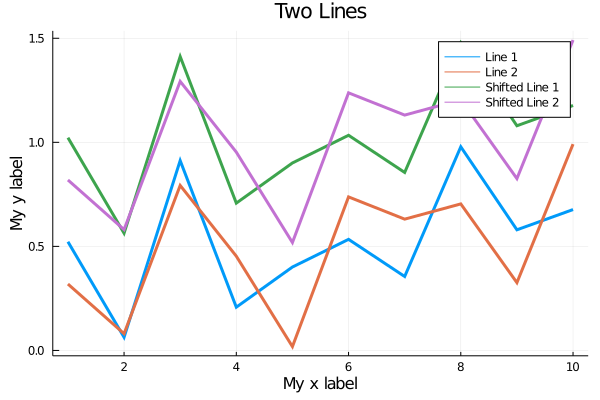

In [66]:
using Plots
x = 1:10; y = rand(10, 2) # 2 columns means two lines
plot(x, y, title = "Two Lines", label = ["Line 1" "Line 2"], lw = 3)
plot!(x, y.+0.5, label = ["Shifted Line 1" "Shifted Line 2"], lw = 3)
xlabel!("My x label"); ylabel!("My y label")